In [1]:
import logging
logging.basicConfig (
    format = '%(asctime)s [%(levelname)s] %(message)s',
    level = logging.DEBUG
)

from init import *

In [2]:
class Example1UKF (UnscentedKalmanFilter):
    
    def __init__ (self):

        # the true state (used in this test)
        self.__true_state = np.matrix([
            [1.1],
            [2.2]
        ], dtype=np.float64)
        
        # initial state estimate
        self.x = np.matrix([
            [-1],
            [1.5]
        ], dtype=np.float64)

        # initial state error matrix
        big = 10
        self.P = np.matrix([
            [big, 0 ],
            [ 0, big]
        ], dtype=np.float64)
        
        super().__init__(2,1)
        
        self.monitor = KalmanFilterMonitor(self)

    def GetTrueState (self):
        '''optional, only useful for testing'''
        return self.__true_state
        
    def GetIterationTime (self,iteration):
        return float(iteration)
        
    def GetPredictedMeasurement (self, state, iteration):
        '''override'''
        assert state.shape == (2,1)
        value = state[0,0] + state[1,0]**2 * self.GetIterationTime(iteration)
        return np.matrix([[value]], dtype=np.float64)
        
    def GetMeasurement (self, iteration):
        '''override'''
        sigma = 1
        measurement_error = np.random.default_rng().normal(0,sigma)
        error_matrix = np.matrix([[sigma]], dtype=np.float64)
        measurement_value = self.GetPredictedMeasurement(self.__true_state, iteration) + measurement_error
        return (measurement_value, error_matrix)
    
    def Log (self, iteration, name, value):
        self.monitor.AddData(iteration, name, value)

In [3]:
e = Example1UKF()
e.RunAllIterations(1,100)

In [4]:
import pandas as pd
df = pd.DataFrame(e.monitor._data)
df

,iteration,residual[0],residual.length,state[0],state[1],state_diff[0],state_diff[1],state_diff.length
0,1,3.441532,11.844145,-1.098049,1.205852,-2.198049,-0.994148,5.819751
1,2,6.249906,39.061321,-1.146255,0.904062,-2.246255,-1.295938,6.725118
2,3,2.994078,8.964504,-1.158131,0.804159,-2.258131,-1.395841,7.047526
3,4,-1.846570,3.409820,-1.155282,0.854522,-2.255282,-1.345478,6.896609
4,5,-1.199409,1.438583,-1.156614,0.886268,-2.256614,-1.313732,6.818200
...,...,...,...,...,...,...,...,...
95,96,1.040879,1.083428,1.829044,2.198219,0.729044,-0.001781,0.531508
96,97,0.112308,0.012613,1.832360,2.198200,0.732360,-0.001800,0.536354
97,98,-1.842605,3.395195,1.778696,2.198513,0.678696,-0.001487,0.460631
98,99,-0.893178,0.797767,1.753024,2.198661,0.653024,-0.001339,0.426443


2023-01-04 01:00:41,479 [DEBUG] matplotlib data path: /home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2023-01-04 01:00:41,483 [DEBUG] CONFIGDIR=/home/zvyagin/.config/matplotlib
2023-01-04 01:00:41,485 [DEBUG] interactive is False
2023-01-04 01:00:41,485 [DEBUG] platform is linux
2023-01-04 01:00:41,538 [DEBUG] CACHEDIR=/home/zvyagin/.cache/matplotlib
2023-01-04 01:00:41,542 [DEBUG] Using fontManager instance from /home/zvyagin/.cache/matplotlib/fontlist-v330.json
2023-01-04 01:00:41,749 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-04 01:00:41,751 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-04 01:00:41,753 [DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-01-04 01:00:41,754 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', n

2023-01-04 01:00:41,773 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,773 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,774 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,774 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STI

2023-01-04 01:00:41,793 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman8-italic.otf', name='Latin Modern Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-04 01:00:41,794 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-Eight.otf', name='Fira Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,795 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/roboto-slab/RobotoSlab-Bold.ttf', name='Roboto Slab', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,795 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/firasanscompressed-regular.otf', name='Fira Sans Compressed', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,796 [DEBUG] findfont: sc

2023-01-04 01:00:41,827 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansquot8-regular.otf', name='Latin Modern Sans Quotation', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,828 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf', name='Ubuntu', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-04 01:00:41,829 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf', name='Latin Modern Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,831 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman5-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,832 [DEBUG] 

2023-01-04 01:00:41,858 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmromanslant12-regular.otf', name='Latin Modern Roman Slanted', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,859 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraBold.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
2023-01-04 01:00:41,859 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrepagella-regular.otf', name='TeX Gyre Pagella', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,860 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-HairItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=100, stretch='cond

2023-01-04 01:00:41,876 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansdemicond10-regular.otf', name='Latin Modern Sans Demi Cond', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
2023-01-04 01:00:41,877 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrebonum-regular.otf', name='TeX Gyre Bonum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,878 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraLightItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=250, stretch='condensed', size='scalable')) = 11.3925
2023-01-04 01:00:41,878 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman10-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', s

2023-01-04 01:00:41,902 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstArt.ttf', name='KacstArt', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-04 01:00:41,903 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-HairItalic.otf', name='Fira Sans', style='italic', variant='normal', weight=100, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,903 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-04 01:00:41,904 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmonoproplt10-regular.otf', name='Latin Modern Mono Prop Light', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,904 [DEBUG] findfon

2023-01-04 01:00:41,924 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,924 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,925 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Jet.ttf', name='Jet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,925 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-sans/OpenSans-CondLight.ttf', name='Open Sans', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
2023-01-04 01:00:41,926 [DEBUG] findfont: score(FontE

2023-01-04 01:00:41,938 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nagham.ttf', name='Nagham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,938 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-Hair.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
2023-01-04 01:00:41,938 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2023-01-04 01:00:41,939 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,939 [DEBUG] 

2023-01-04 01:00:41,954 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf', name='Latin Modern Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,954 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,954 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Mashq.ttf', name='Mashq', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,955 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-04 01:00:41,955 [DEBUG] findfont: score(F

2023-01-04 01:00:41,969 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf', name='URW Bookman', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2023-01-04 01:00:41,970 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Furat.ttf', name='Furat', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,970 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf', name='Ubuntu', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,971 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nice.ttf', name='Nice', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,971 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-

2023-01-04 01:00:41,985 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_AlArabiya.ttf', name='AlArabiya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,986 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-04 01:00:41,986 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Bold.otf', name='C059', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:41,986 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-regular.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:41,987 [DEBUG] findfont: score(FontEnt

2023-01-04 01:00:41,998 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCompressed-SemiBoldItalic.otf', name='Fira Sans Compressed', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
2023-01-04 01:00:41,999 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-UltraItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=950, stretch='condensed', size='scalable')) = 11.772499999999999
2023-01-04 01:00:41,999 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf', name='URW Gothic', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-04 01:00:41,999 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-bold.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=700, stretch='normal', size='scalabl

2023-01-04 01:00:42,018 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Hor.ttf', name='Hor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:42,019 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Dimnah.ttf', name='Dimnah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:42,019 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Granada.ttf', name='Granada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-04 01:00:42,019 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', name='Ubuntu', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-04 01:00:42,021 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVu

<AxesSubplot: xlabel='iteration'>

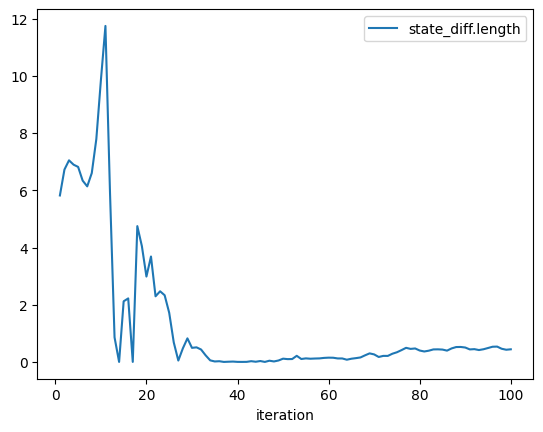

In [5]:
df.plot(x='iteration', y='state_diff.length')

<AxesSubplot: xlabel='iteration'>

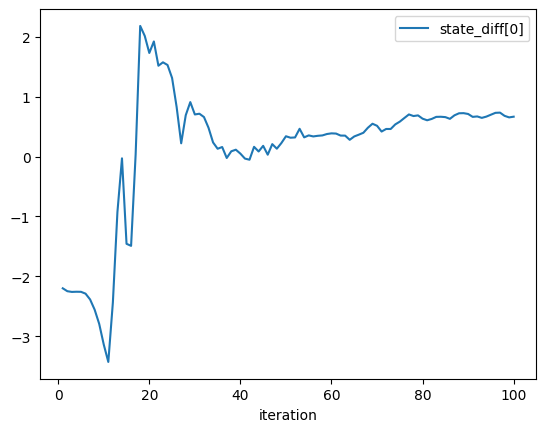

In [6]:
df.plot(x='iteration', y='state_diff[0]')

<AxesSubplot: xlabel='iteration'>

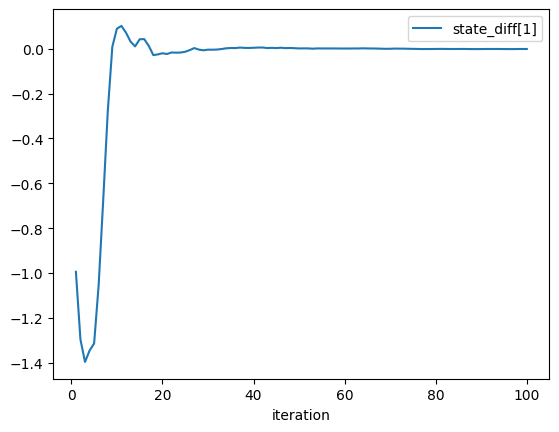

In [7]:
df.plot(x='iteration', y='state_diff[1]')

<AxesSubplot: xlabel='iteration'>

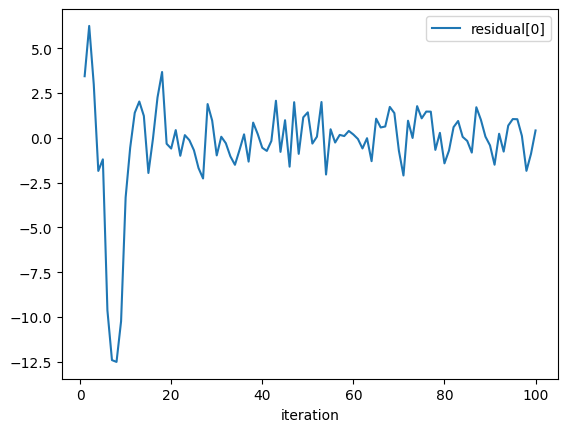

In [8]:
df.plot(x='iteration', y='residual[0]')